<a href="https://colab.research.google.com/github/Aniketdpatil2407/Aniketdpatil2407/blob/main/stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf

In [6]:
#See the yahoo finance ticker for your stock symbol
stock_symbol= 'INFY'

In [8]:
#last 6 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='6y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-16,7.495,7.540,7.40,7.450,6.338472,10166800
2016-12-19,7.460,7.485,7.42,7.435,6.325711,4106400
2016-12-20,7.455,7.475,7.43,7.465,6.351234,6409200
2016-12-21,7.450,7.485,7.42,7.485,6.368251,4951800
2016-12-22,7.360,7.425,7.29,7.400,6.295932,5821400


In [11]:
len(data)

1511

In [12]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12,18.490000,18.530001,18.360001,18.410000,18.410000,6741000
2022-12-13,19.010000,19.150000,18.629999,18.730000,18.730000,13184600
2022-12-14,18.750000,18.969999,18.600000,18.719999,18.719999,7721700
2022-12-15,18.330000,18.360001,18.010000,18.170000,18.170000,6568600
2022-12-16,18.110001,18.215000,17.975000,17.976000,17.976000,3412151


In [13]:
opn = data[['Open']]

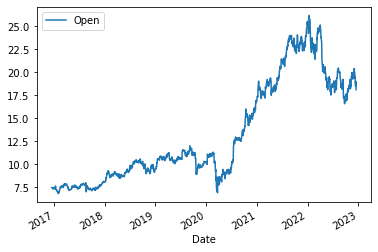

In [14]:
opn.plot()

In [15]:
import matplotlib.pyplot as plt

In [16]:
ds = opn.values

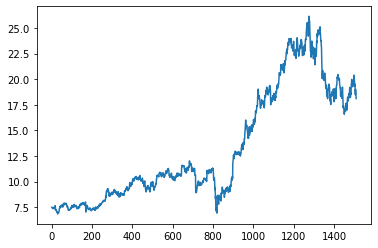

In [17]:
plt.plot(ds)

In [18]:
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [21]:
len(ds_scaled), len(ds)

(1511, 1511)

In [22]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [23]:
train_size,test_size

(1057, 454)

In [24]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [25]:
len(ds_train),len(ds_test)

(1057, 454)

In [26]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [27]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [28]:
X_train.shape,y_train.shape

((956, 100), (956,))

In [29]:
X_test.shape, y_test.shape

((353, 100), (353,))

In [30]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [32]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
15/15 [==============================] - 12s 298ms/step - loss: 0.0113 - val_loss: 0.0510
Epoch 2/100
15/15 [==============================] - 3s 197ms/step - loss: 0.0020 - val_loss: 0.0041
Epoch 3/100
15/15 [==============================] - 3s 194ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 4/100
15/15 [==============================] - 3s 194ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 5/100
15/15 [==============================] - 3s 194ms/step - loss: 9.4810e-04 - val_loss: 0.0034
Epoch 6/100
15/15 [==============================] - 3s 196ms/step - loss: 9.1786e-04 - val_loss: 0.0033
Epoch 7/100
15/15 [==============================] - 3s 192ms/step - loss: 8.7552e-04 - val_loss: 0.0048
Epoch 8/100
15/15 [==============================] - 3s 194ms/step - loss: 8.5790e-04 - val_loss: 0.0032
Epoch 9/100
15/15 [==============================] - 3s 196ms/step - loss: 8.4272e-04 - val_loss: 0.0028
Epoch 10/100
15/15 [==============================] - 3s 194ms/step - 

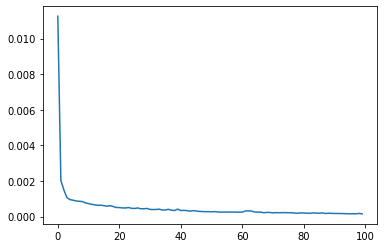

In [34]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [36]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

12/12 [==============================] - 0s 34ms/step


In [37]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

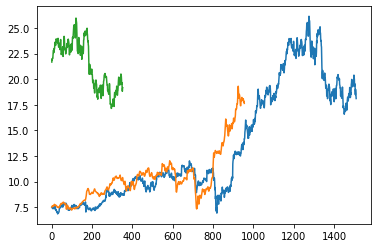

In [38]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [39]:
type(train_predict)

numpy.ndarray

In [40]:
test = np.vstack((train_predict,test_predict))

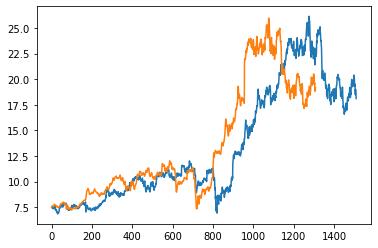

In [41]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [42]:
len(ds_test)

454

In [44]:
#Getting the last 100 days records
fut_inp = ds_test[270:]

In [45]:
fut_inp = fut_inp.reshape(1,-1)

In [46]:
tmp_inp = list(fut_inp)

In [47]:
fut_inp.shape

(1, 184)

In [48]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [74]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=183
i=0
while(i<30):
    
    if(len(tmp_inp)>183):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.8215881586074829], [0.8237053751945496], [0.8259205222129822], [0.8282299637794495], [0.8306196331977844], [0.8330696225166321], [0.8355571031570435], [0.8380590081214905], [0.8405538201332092], [0.8430241942405701], [0.8454556465148926], [0.8478376269340515], [0.8501631617546082], [0.8524273037910461], [0.854627251625061], [0.8567616939544678], [0.8588294386863708], [0.8608297109603882], [0.8627619743347168], [0.864625871181488], [0.8664209246635437], [0.8681474924087524], [0.8698052763938904], [0.8713955283164978], [0.8729202747344971], [0.8743807673454285], [0.8757801055908203], [0.8771214485168457], [0.8784081339836121], [0.8796433210372925]]


In [75]:
len(ds_scaled)

1511

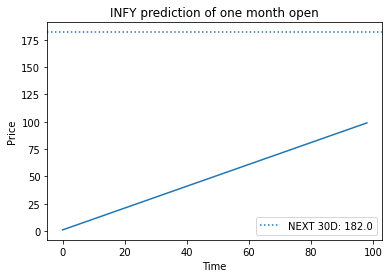

In [92]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,100)
plot_pred=np.arange(1,183)
plt.plot(plot_new)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of one month open".format(stock_symbol))
plt.axhline(y=plot_pred[len(plot_pred)-1],linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(plot_pred[len(plot_pred)-1]),2)))
plt.legend()



In [58]:
ds_new = ds_scaled.tolist()

In [59]:
len(ds_new)

1511

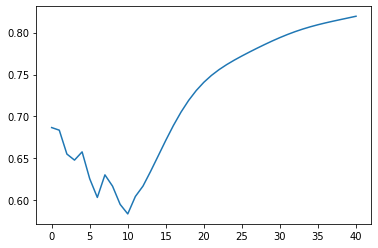

In [60]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1500:])

In [61]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

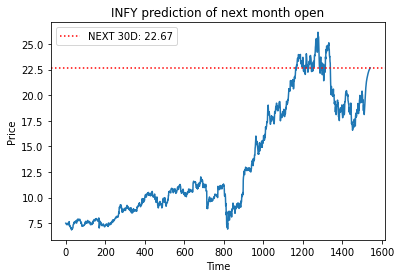

In [71]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()
